# Projet d'optimisation 
## Par  Rania Fathi et Pierre Sion 

## I- Modélisation 

### Question 1 :
On définit l'élasticité-prix comme étant la variation relative de la quantité demandée par rapport au prix, soit encore: 
    $\varepsilon_i = \frac{\frac{dx_i}{x_i}}{\frac{dp_i}{p_i}} $ 
où l'on a noté $x_i$ la demande et $p_i$ le prix du ième produit 
    
Cela peut encore s'écrire: 
$\varepsilon_i = \frac{\partial x_i}{\partial p_i} \frac{p_i}{x_i}$

Comme on s'attend à ce que la demande pour un produit diminue si le prix augmente, on a $\varepsilon_i \leq 0$

Pour ce qui est de l'élasticité prix croisée entre le gouda et l'edam, elle vaut: 

$\varepsilon_c = \frac{\frac{dx_g}{x_g}}{\frac{dp_e}{p_e}} = \frac{\partial x_g}{\partial p_e} \frac{p_e}{x_g}$

Les biens considérés étant substituables, on a $\varepsilon_c \geq 0$ 

### Question 2 :
Le lait brut possède une quantité de matière grasse totale répartie entre les quatre produits, que l'on note $M$. En notant $m_i$ la teneur en matière grasse présente dans chaque produit, on a : 

$ \sum_{i=1}^{4}m_i x_i \leq M$

On fait par ailleurs le choix de mettre une inégalité plutôt qu'une égalité pour considérer le cas où tout le lait n'est pas transformé 

### Question 3 : 
De la même manière, on note $L$ la quantité totale de lactose contenue dans le lait, et $l_i$ celle contenue dans chaque produit, et on a alors la contrainte suivante: 

$\sum_{i=1}^{4} l_i x_i \leq L $

### Question 4 :

Afin de garantir la paix sociale, la moyenne (pondérée par la part de chaque produit dans le budget) des changements de prix relatifs ne doit pas être positive.
On note $b_i$ la part du ième produit dans le budget (déterminée à partir des données de l'année N-1). Cette contrainte s'écrit donc: 
$\sum_{i=1}^{4}b_i \frac{dp_i}{p_i} \leq 0$

Comme les contraintes dont on dispose jusque maintenant portent sur les quantités et non pas les prix, on la réécrit sous la forme suivante : $ \sum_{i=1}^4 \frac{b_i}{\epsilon_i} \frac{dx_i}{x_i} \leq 0$ 

### Question 5 :

_En supposant qu'on dispose déjà des $(p_i)_{1\leq i\leq4}$, $(b_i)_{1\leq i\leq4}$, $(\epsilon_i)_{1\leq i\leq4}$, $(m_i)_{1\leq i \leq 4}$, de $M$ et $L$_  
On dispose donc du problème d'optimisation sous contraintes suivant : $\max_{c(x) \leq 0} \Pi (x)$ 

où le profit $\Pi:\mathbf{R}^4 \rightarrow \mathbf{R}  $ vaut $\Pi(x) = \sum_{i=1}^4 p_i x_i $ (En toute rigueur, $\Pi$ est égal au revenu plutôt qu'au profit, mais l'omission du terme $-C$ correspondant au coût total du lait acheté ne modifie pas le problème d'optimisation à résoudre).

Et les contraintes $c : \mathbf{R}^4 \rightarrow \mathbf{R}^7$ sont les suivantes : 

$c_1(x) = - x_1 \\ 
c_2(x) = - x_2\\ 
c_3(x) = - x_3\\ 
c_4(x) = - x_4$

Ces quatre premières contraintes traduisent le fait que les quantités considérées sont nécessairement positives. Et nous disposons des deux contraintes des questions 2 et 3: 

$c_5(x) = \sum_{i=1}^{4}m_i x_i - M\\ 
c_6(x) = \sum_{i=1}^{4} l_i x_i - L $

Et enfin :
$c_7(x) =  \sum_{i=1}^4 \frac{b_i}{\epsilon_i} \frac{dx_i}{x_i} \leq 0$

NB: Il aurait été possible d'ajouter les contraintes portant sur le signe de l'élasticité des produits, imposant que l'augmentation du prix d'un produit réduit la demande, ou encore celles stipulant que les prix des produits se doivent d'être positifs 

On cherche donc à résoudre $max_{C^Tp-d \leq 0} b^T p - \frac{1}{2} p^T A p$ soit encore $min_{C^Tp-d \leq 0} \frac{1}{2} p^T A p- b^T p$

## II- Implémentation 

Nous remarquons dans un premier temps que les contraintes sont linéaires et que la fonction à minimiser est quadratique, ce qui montre que le problème est convexe, et les fonctions sont différentiables. De plus, comme la matrice $A$ étant symétrique positive, on est assuré de l'existence et l'unicité du minimum. 

### Cadre de travail

In [203]:
import numpy as np 
from scipy import optimize
import pylab
import matplotlib.pyplot as plt

 #Données :
A = np.array([[3.0825,0,0,0],
              [0,0.0405,0,0],
              [0,0,0.0271,-0.0031],
              [0,0,-0.0031,0.0054]])
b = np.array([2671,135,103,19])

C = np.array([[-0.0401,-0.0162,-0.0039,0.0002],
              [-0.1326,-0.0004,-0.0034,0.0006],
              [1.5413,0,0,0],
              [0,0.0203,0,0],
              [0,0,0.0136,-0.0015],
              [0,0,-0.0016,0.0027],
              [0.0160,0.0004,0.0005,0.0002]])

d = np.array([-92.6,-29,2671,135,103,19,10])

x0=np.array([2055,54,63,17])
lambda0 = np.array([1e-8 for i in range(7)])

#Fonction à minimiser :
def f(x):
    return 0.5 * np.vdot(np.dot(x,A),x) - np.vdot(b,x)

def grad_f(x):
    return np.dot(A,x) - b 

# Contraintes:

def c(x) :
    return np.dot(C,x) - d 

def grad_c(x):
    return C
def c_m(x) :
    return -np.dot(C,x) + d 

def grad_c_m(x):
    return -C

On commence par déterminer la solution de notre problème à l'aide de scipy, afin de pouvoir y comparer nos résultats (on a commencé par essayer de modifier simplement la tolérance mais l'algorithme ne convergeait pas, cf suite): 

In [204]:
tolerance = 1e-9
ineq_cons_f = {'type': 'ineq','fun' : c_m,'jac' : grad_c_m}
res_scipy_f = optimize.minimize(f, x0, method='SLSQP', jac = grad_f, constraints=[ineq_cons_f], options={'ftol': tolerance, 'disp': True})
print("x_scipy_f : ", res_scipy_f.x)
print("grad_f(x_scipy_f) : ", grad_f(res_scipy_f.x))
print("c(x_scipy_f) : ", c_m(res_scipy_f.x))
print(res_scipy_f.success)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1280286.610982609
            Iterations: 16
            Function evaluations: 12
            Gradient evaluations: 12
x_scipy_f :  [ 420.23259677 4025.00823812 2774.95785643 1393.98114058]
grad_f(x_scipy_f) :  [-1375.63302045    28.01283364   -32.11998363   -20.0748712 ]
c(x_scipy_f) :  [-1.36424205e-11  3.69313137e+01  2.02329550e+03  5.32923328e+01
  6.73515449e+01  1.96761835e+01  7.86197774e-11]
False


Nous avons donc opté pour une autre méthode :

In [205]:
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint (C, [-np.inf for i in d], d)
from scipy.optimize import minimize


res = minimize (f, x0, method = 'trust-constr', jac = grad_f,
                constraints =[linear_constraint],
                options = {'verbose': 1})

print("x_scipy_f : ", res.x)
print("grad_f(x_scipy_f) : ", grad_f(res.x))
print("c(x_scipy_f) : ", c_m(res.x))
print(res.success) 

`gtol` termination condition is satisfied.
Number of iterations: 44, function evaluations: 38, CG iterations: 90, optimality: 5.61e-12, constraint violation: 0.00e+00, execution time: 0.075 s.
x_scipy_f :  [ 420.2326016  4025.00826627 2774.95768908 1393.98111676]
grad_f(x_scipy_f) :  [-1375.63300558    28.01283478   -32.11998809   -20.07487081]
c(x_scipy_f) :  [1.55863233e-09 3.69313138e+01 2.02329549e+03 5.32923322e+01
 6.73515471e+01 1.96761833e+01 6.64801547e-11]
True


Les résultats sont inchangés par rapport à la méthode SLSQP, mais l'algorithme annonce avoir convergé. Pour avoir testé d'autres méthodes de scipy.optimize et obtenu les mêmes résultats, on considérera qu'il s'agit d'une valeur approchée de notre résultat, et nous y comparerons les outputs de nos autres algorithmes :

### I. Méthode d'Uzawa, à pas fixe et variable (wolfe): 

In [206]:
def uzawa_fixed_step_array(fun, grad_fun, c, grad_c, x0, l, rho, lambda0, max_iter = 10000, epsilon_grad_L = 1e-8):
	k = 0
	xk = x0
	lambdak = lambda0
	grad_Lagrangienk_xk = grad_fun(xk) + np.dot(lambdak,grad_c(xk))
	while ((k<max_iter) and (np.linalg.norm(grad_Lagrangienk_xk)>epsilon_grad_L)):
		grad_Lagrangienk_xk = grad_fun(xk) + np.dot(lambdak,grad_c(xk))
		pk = -grad_Lagrangienk_xk
		xk = xk + l*pk;    
		lambdak= np.maximum(0, lambdak + rho*c(xk))	
		k = k + 1
	return xk


In [207]:
def wolfe_step(fun, grad_fun, xk, pk, c1 = 0.25, c2 = 0.75, M = 1000):
	l_moins = 0
	l_plus = 0
	f_xk = fun(xk)
	grad_f_xk = grad_fun(xk)
	li = 0.0001
	i = 0
	while(i < M):
		if (fun(xk+li*pk)>(f_xk+c1*li*np.dot(grad_f_xk,pk))):
			l_plus = li
			li = (l_moins+l_plus)/2.0
		else:
			if (np.dot(grad_fun(xk+li*pk),pk) < c2*np.dot(grad_f_xk,pk)):
				l_moins = li
				if (l_plus == 0):
					li = 2*li
				else:
					li = (l_moins+l_plus)/2.0
			else:
				#print("Nb itérations : ", i)
				return li
		i = i + 1
	#print("Trop d'itérations de Wolfe")
	return li

def uzawa_wolfe_step_array(fun, grad_fun, c, grad_c, x0, rho, lambda0, max_iter = 10000, epsilon_grad_L = 1e-8):
	k = 0
	xk = x0
	lambdak = lambda0
	grad_Lagrangienk_xk = grad_fun(xk) + np.dot(lambdak,grad_c(xk))
	while ((k<max_iter) and (np.linalg.norm(grad_Lagrangienk_xk)>epsilon_grad_L)):
		Lagrangienk = lambda x : fun(x) + np.dot(lambdak, c(x))
		grad_Lagrangienk = lambda x : grad_fun(x) + np.dot(lambdak, grad_c(x))
		grad_Lagrangienk_xk = grad_Lagrangienk(xk)
		pk = -grad_Lagrangienk_xk
		lk = wolfe_step(Lagrangienk, grad_Lagrangienk, xk, pk)
		xk = xk + lk*pk;    
		lambdak = np.maximum(0, lambdak + rho*c(xk))
		k = k + 1
	return xk



### II. Méthode de Newton BFGS :

In [208]:
def newton_BFGS_array(f, grad_f, c, grad_c, x0, lambda0, max_iter = 100000, epsilon_grad_L = 1e-5):
	k = 0
	xk = x0
	lambdak = lambda0
	Hk = np.identity(len(x0))
	grad_Lagrangienk_xk = grad_f(xk) + np.dot(lambdak,grad_c(xk))
	while ((k<max_iter) and (np.linalg.norm(grad_Lagrangienk_xk)>epsilon_grad_L)):
		Lagrangienk = lambda x : f(x) + np.dot(lambdak, c(x))
		grad_Lagrangienk = lambda x : grad_f(x) + np.dot(lambdak, grad_c(x))
		grad_Lagrangienk_xk = grad_Lagrangienk(xk)
		pk = -np.matmul(Hk,grad_Lagrangienk_xk)
		lk = wolfe_step(Lagrangienk, grad_Lagrangienk, xk, pk)
		xk1 = xk + lk*pk
		grad_Lagrangienk_xk1 = grad_Lagrangienk(xk1)
		sk = xk1 - xk
		yk = grad_Lagrangienk_xk1 - grad_Lagrangienk_xk
		gammak = 1.0/np.dot(yk, sk)
		Ak = np.identity(len(x0)) - gammak*np.multiply(sk[:, np.newaxis], yk)
		Bk = np.identity(len(x0)) - gammak*np.multiply(yk[:, np.newaxis], sk)
		Hk = np.matmul(np.matmul(Ak, Hk), Bk) + gammak*np.multiply(sk[:, np.newaxis], sk)
		xk = xk1 
		
		for i in range(len(c(xk))):
			rhok = np.dot(grad_c(xk)[i], np.matmul(Hk,grad_c(xk)[i]))
			lambdak[i] = np.maximum(0, lambdak[i] + (1/rhok)*c(xk)[i])
		k = k + 1
	return xk


### III. Méthode  d'Arrow-Hurwickz

On commence par construire le projecteur sur $\mathbb{R}_{+}$ :

In [209]:
def proj(x):
    for i in range(0,len(x)):
        if x[i]<0:
            x[i]=0
    return x

Ce qui permet d'implémenter l'algorithme AH : 

In [210]:
def algo_ah(x0,lambda0, epsilon=0.1, alpha=0.001, max_iterations = 10000, epsilon_grad_f = 1e-8):   
    lambdak=lambda0
    xl = x0
    xk = xl - epsilon*(grad_f(xl) + (np.transpose(C)).dot(lambdak))
    compteur = 1 
    while(compteur <= max_iterations and np.linalg.norm(grad_f(xk))>epsilon_grad_f):
        compteur += 1
        xk = xk - epsilon * (grad_f(xk) + (np.transpose(C)).dot(lambdak))
        lambdak = proj(lambdak + alpha * (np.dot(C,xk) - d))
    return xk

### Comparaison des résultats

In [211]:
X_scipy = res_scipy_f.x
X_fixed_step_V = uzawa_fixed_step_array(f, grad_f, c, grad_c, x0, 0.0001, 0.1, lambda0)
X_wolfe_step_V = uzawa_wolfe_step_array(f, grad_f, c, grad_c, x0, 0.1, lambda0)
X_newton_BFGS = newton_BFGS_array(f, grad_f, c, grad_c, x0, lambda0)
X_AH = algo_ah(x0,lambda0)

L = [X_scipy,X_fixed_step_V,X_wolfe_step_V,X_newton_BFGS,X_AH]
p_lait = [x[0] for x in L]
p_beurre = [x[1] for x in L]
p_gouda = [x[2] for x in L]
p_edam = [x[3] for x in L]
BarName = ["SLSQP","Uzawa pas fixe","Uzawa wolfe","BFGS","Arrow-Hurwickz"]
x=[i+1 for i in range(len(L))]

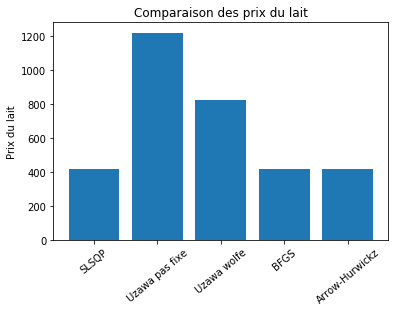

In [212]:
plt.bar(x,p_lait)
plt.ylabel('Prix du lait')
plt.title('Comparaison des prix du lait')
pylab.xticks(x, BarName, rotation=40)
plt.show()

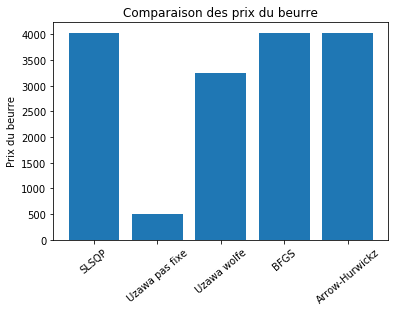

In [213]:
plt.bar(x,p_beurre)
plt.ylabel('Prix du beurre')
plt.title('Comparaison des prix du beurre')
pylab.xticks(x, BarName, rotation=40)
plt.show()

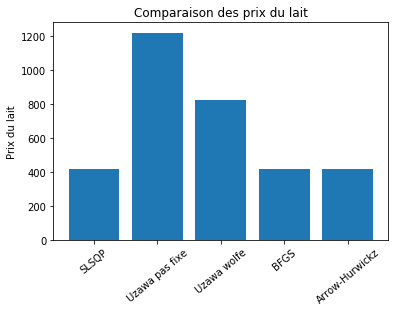

In [214]:
plt.bar(x,p_lait)
plt.ylabel('Prix du lait')
plt.title('Comparaison des prix du lait')
pylab.xticks(x, BarName, rotation=40)
plt.show()

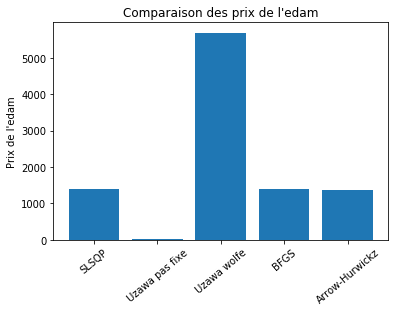

In [215]:
plt.bar(x,p_edam)
plt.ylabel("Prix de l'edam")
plt.title("Comparaison des prix de l'edam")
pylab.xticks(x, BarName, rotation=40)
plt.show()

# Synthèse : 

Les algorithmes d'Uzawa donnent des résultats assez peu satisfaisants : il faut réduire le pas dans le cas fixe et réduire li dans le cas variable pour avoir des résultats plus cohérents, mais cela allonge considérablement le temps de calcul. BFGS et Arrow-Hurwickz donnent en apparence une plus grande précision, mais en comparant leurs résultats respectifs (cf cellule ci-dessous), on voit que BFGS donne des résultats égaux aux attendus à 1e-4 près. Le problème étant de petite taille, la stockage de l'approximation du hessien n'est pas non plus problématique.

In [216]:
differences =np.array([[p_lait[4] - p_lait[0], p_lait[3] - p_lait[0]],
             [p_beurre[4] - p_beurre[0], p_beurre[3] - p_beurre[0]],
             [p_gouda[4] - p_gouda[0], p_gouda[3] - p_gouda[0]],
             [p_edam[4] - p_edam[0], p_edam[3] - p_edam[0]]])

erreurs = [sum(abs(differences[i,0]) for i in range(4)), sum(abs(differences[i,1]) for i in range(4))]
print(erreurs)

[20.043683523850575, 0.0002935052251586967]


# En modifiant les valeurs d'entrée

Comme la méthode BFGS donne les meilleurs résultats, nous choisissons de tester sa robustesse en modifiant quelque peu les données (A et C) d'un facteur epsilon = 1e-4

In [217]:
x0=np.array([2055,54,63,17])
lambda0 = np.array([1e-8 for i in range(7)])
 
    #Données :
    
A_bis = A + 1e-4 * np.eye(4)

C_bis = C + 1e-4 * np.ones((7,4))


#Fonction à minimiser :
def f_bis(x):
    return 0.5 * np.vdot(np.dot(x,A_bis),x) - np.vdot(b,x)

def grad_f_bis(x):
    return np.dot(A_bis,x) - b 

# Contraintes:

def c_bis(x) :
    return np.dot(C_bis,x) - d 

def grad_c_bis(x):
    return C_bis
def c_m_bis(x) :
    return -np.dot(C_bis,x) + d 

def grad_c_m_bis(x):
    return -C_bis



In [218]:
def algo_ah_bis(x0,lambda0, epsilon=0.1, alpha=0.001, max_iterations = 10000, epsilon_grad_f = 1e-8):   
    lambdak=lambda0
    xl = x0
    xk = xl - epsilon*(grad_f_bis(xl) + (np.transpose(C_bis)).dot(lambdak))
    compteur = 1 
    while(compteur <= max_iterations and np.linalg.norm(grad_f_bis(xk))>epsilon_grad_f):
        compteur += 1
        xk = xk - epsilon * (grad_f_bis(xk) + (np.transpose(C_bis)).dot(lambdak))
        lambdak = proj(lambdak + alpha * (np.dot(C_bis,xk) - d))
    return xk
print (algo_ah_bis(x0,lambda0))

[ 865.98098571 3323.98520491 4459.18632755 5926.63505705]


In [219]:
X_scipy_bis = res_scipy_f.x
X_newton_BFGS_bis = newton_BFGS_array(f_bis, grad_f_bis, c_bis, grad_c_bis, x0, lambda0)
X_newton_AH_bis = algo_ah_bis(x0,lambda0)

L_bis = [X_scipy_bis, X_newton_BFGS_bis, X_newton_AH_bis]
p_lait = [x[0] for x in L_bis]
p_beurre = [x[1] for x in L_bis]
p_gouda = [x[2] for x in L_bis]
p_edam = [x[3] for x in L_bis]
BarName = ["SLSQP","BFGS", "AH"]
x=[i+1 for i in range(len(L_bis))]

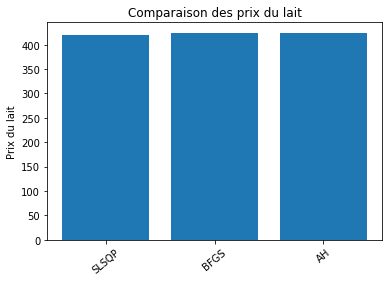

In [220]:
plt.bar(x,p_lait)
plt.ylabel('Prix du lait')
plt.title('Comparaison des prix du lait')
pylab.xticks(x, BarName, rotation=40)
plt.show()

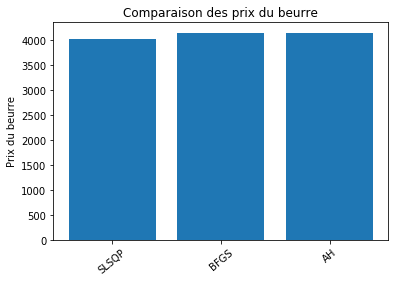

In [221]:
plt.bar(x,p_beurre)
plt.ylabel('Prix du beurre')
plt.title('Comparaison des prix du beurre')
pylab.xticks(x, BarName, rotation=40)
plt.show()

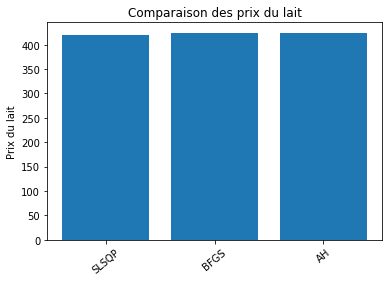

In [222]:
plt.bar(x,p_lait)
plt.ylabel('Prix du lait')
plt.title('Comparaison des prix du lait')
pylab.xticks(x, BarName, rotation=40)
plt.show()

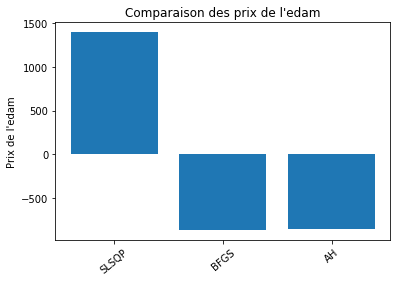

In [223]:
plt.bar(x,p_edam)
plt.ylabel("Prix de l'edam")
plt.title("Comparaison des prix de l'edam")
pylab.xticks(x, BarName, rotation=40)
plt.show()

A nouveau, les graphiques nous permettent simplement de voir que les valeurs sont plus ou moins "proches" pour certains produits, nous déterminons les erreurs numériques :

In [225]:
differences =np.array([[p_lait[2] - p_lait[0], p_lait[1] - p_lait[0]],
             [p_beurre[2] - p_beurre[0], p_beurre[1] - p_beurre[0]],
             [p_gouda[2] - p_gouda[0], p_gouda[1] - p_gouda[0]],
             [p_edam[2] - p_edam[0], p_edam[1] - p_edam[0]]])

erreurs = [sum(abs(differences[i,0]) for i in range(4)), sum(abs(differences[i,1]) for i in range(4))]
print(erreurs)

[2905.4603773703197, 2905.2850243273815]


Elles sont cette fois très importantes, surtout en ce qui concerne l'edam, que ça soit pour BFGS ou AH. On en déduit que ces algorithmes sont assez peu robustes, car une erreur de l'ordre de 1e-4 sur les données modifie énormément les résultats. 